# CE4145: Text Classification - Comparative Pipelines
This notebook implements a comparative evaluation of two text classification pipelines on the “Sentiment Labelled Sentences” datasets (Amazon, IMDb, Yelp).

I acknowledge use of OpenAI ChatGPT from chatgpt.com to  plan, research and generate ideas for the content and 
structure, or on how to improve the work. I entered the following prompts on [21.10.25-30.10.25]: 

1. "Im not sure which algorithms I should be using for my NLP coursework. The brief says to compare two different pipelines, but doesnt really specify which algorithms to use. I dont want to pick something thats too advanced or irrelevant. What would make sense for text classification?"

"That’s a great question — and you’re thinking about it in the right way. For this kind of task, you want two algorithms that are different enough to compare meaningfully, but not so complex that they’re outside the scope of what’s been taught.

Since your project is focused on text classification, the most sensible and interpretable baseline choice would be Multinomial Naïve Bayes (MNB). It’s fast, lightweight, and works really well with word-frequency representations like TF–IDF.

For your second pipeline, a good contrasting approach would be a Linear Support Vector Machine (SVM). It’s fundamentally different from Naïve Bayes — instead of estimating probabilities, it learns a decision boundary that separates positive and negative examples.

Both models are widely used in NLP, both are covered in most university-level machine learning content, and both work very well with the kinds of vectorised features you’ll be using. This gives you a fair, balanced comparison between a probabilistic and a geometric model — exactly what your brief is asking for."



2. "I dont really understand how to create a virtual environment or what it even does. I know its something to do with Python projects, but can you explain what its for and give me the exact steps to make one?"

"Of course! A virtual environment (often called a “venv”) is like a little isolated box where your project’s Python packages live. It keeps everything separate so that installing one version of a library for one project doesn’t mess up another project on your computer.

It’s not strictly required for every small project, but it’s a really good habit — especially for coursework like this. It means your dependencies are consistent, your code is reproducible, and you can share your setup with others (like your lecturer) without breaking anything.

Here’s exactly how to make and activate one:

On Windows (Command Prompt):

py -3.11 -m venv .venv  
.\venv\Scripts\activate


Once you run the first line, Python creates a folder called .venv that holds everything your project needs. The second line activates it, which means your terminal will now show something like (venv) before the path — that’s how you know it worked.

If you’re using PowerShell, you might need to run this instead (because it handles scripts differently):

.\venv\Scripts\Activate.ps1


And if you’re on Mac or Linux, use:

python3 -m venv .venv  
source .venv/bin/activate


After that, you can install all your dependencies (like pandas, numpy, sklearn, etc.) into your virtual environment using:

pip install -r requirements.txt


Every time you open a new terminal, remember you’ll need to activate the environment again before running the notebook or your Python scripts — otherwise, your packages won’t be found."

3. "My virtual environment isnt activating in VS Code. What command should I use on Windows?"

"If you’re using Command Prompt, try:

py -3.11 -m venv .venv  
.\venv\Scripts\activate


For PowerShell, use:

.\venv\Scripts\Activate.ps1"

4. "I keep getting a shape error when I try to fit my model. It says something like “found input variables with inconsistent numbers of samples”. I’m using TF–IDF and Naïve Bayes - what does that mean and how do I fix it?"

"That error usually means your feature matrix (X_train) and labels (y_train) don’t have the same number of rows. It can happen if you split your data incorrectly or reset the index for only one of them.

Try checking this:

print(X_train.shape, y_train.shape)


If the first numbers don’t match, you’ll need to align them. Make sure you’re splitting both X and y at the same time like this:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


That keeps them synced. After that, your model.fit(X_train, y_train) line should work fine."



5. "I need to write a README explaining how to set up and run my project. What should I include?"

"Include setup instructions for the virtual environment, installation of dependencies, and how to open your notebook. Example:

Create a virtual environment

Install from requirements.txt

Run jupyter notebook and open your .ipynb file."





 All of the above content was used to help decide which algorithm models to choose for my model, how to create and implement a virtual environment (venv), bugs related to fitting the models, what content and description to put inside my readme folder, and how to activate my venv.  

## Introduction
This project aims to focus on sentiment classification, which is an ongoing issue within the world of Natural Language Processing (NLP). In this setting, it primarily involves the algorithm determining whether the emotion behind a piece of text or writing is positive or negative. This system is already deployed in many real world applications, such as product reviews, social media monitoring, or film ratings as manually analysing user data at this scale would be impossible. 

The dataset used in this assessment is the Sentiment Labelled Sentences dataset from the UCI Machine Learning Repository. The dataset has a fifty-fifty amount of positive and negative movie reviews from Amazon products, IMDb movies, and Yelp business reviews. If a sentence is postive, it is labelled with a (1), and (0) for negative. This creates a balanced dataset which in turn makes it suitable for supervised learning and also gives a good benchmark for comparing results. 

The objective of this project is to build and evaluate two unique NLP pipelines to perform the binary classification task. The first pipeline uses word-level TF–IDF representations with a Multinomial Naïve Bayes classifier, while the second uses character-level TF–IDF representations with a Linear Support Vector Machine. These pipelines are then compared with each other to identify which approach has the best performance. 


## Section 2: Representation Learning
Before anything can happen, the first necessary step is to convert raw text into a numerical form that algorithms can actually read and process. This has a name: Vectorisation. The process involves representing each sentence as a list of numbers, with the number corresponding to the importance of a word or character pattern based on how frequently it appears in the dataset. 

In this project, the chosen representation technique is TF–IDF (Term Frequency–Inverse Document Frequency). This means words that are unique or distinctive are are assigned an increased weight (a higher number), while words that are abundant or more common are given the opposite treatment. 

The first representation is word-level TF-IDF, where every document is represented by unigrams and bigrams (single words and short phrases). The algorithm then picks up on meaningful expressions with sentiment, for example "excellent" or "awful" and helps them to be recognised. The second representation is character-level TF-IDF, using n-grams of length 3–5. Character-based features capture subword patterns, punctuation, and spelling variations. This helps the model adapt to informal typing practise or misspelled text. 

These two methods are methodologically different, and will be compared to determine whether sentiment is better detected through full words and phrases or through more granular subword patterns.



## Section 3: Algorithms
To evaluate different approaches for sentiment classification, two functionally unique algorithms were tested: Multinomial Naïve Bayes (MNB) and a Linear Support Vector Machine (SVM). Both are popular methods in NLP, but work very differently mathematically. This makes the two models suitable candidates for a comparision. 

Multinomial Naïve Bayes (MNB) is a probabilistic classifier based on Bayes’ Theory. It uses the features (words) to calculate the probability of the class, in this context being positive or negative. The term "naïve" is used because it assumes that features are independant from another, as if each word didnt have an effect of the meaning of another word. Despite sounding flawed by design, MNB performs suprisingly very well on text data. The multinomial aspect means it models feature frequencies, making it ideal for TF–IDF or word count vectorisers. MNB is also very efficient, computationally. It is also easy to understand, and performs particularly well in cases where words very clearly indicate sentiment. However, it cant form relationships between words or interperate linguistically complex language, which in turn can limit algorithm accuracy on more nuanced text. In this project, MNB is paired up with word level TD-IDF features because this representation best works with the assumption that terms are independant from another. 

The Linear Support Vector Machine (SVM), on the other hand, is a discriminative classifier that seeks to find an optimal decision boundary (hyperplane) seperating data points of different classes with the largest difference between them. In this case, that would be positive and negative. The line between the different classes, is called the decision boundary. The job of SVM is to make the boundary as wide as possible so that unseen data can be more easily classed.

SVM's are robust. They perform well even if the data has errors. In this project, the SVM was used with character-level TF-IDF features, since these capture small details such as letter patterns, punctuation, and repeated characters such as, “sooo good” or “terrible!!!”. This helps the model understand informal writing styles or spelling errors. 

These two algorithms offer differing perspectives on the sentiment classifcation problem. Naïve Bayes takes a simplistic approach, simply looking for term occurance probabilities, whereas SVM uses a complex, margin-based approach that is optimised to sperate in feature space. 






## Section 4: Evaluation

The models were analysed and compared by divding the dataset into training, validation and testing sets to ensure optimal performance measurement. The dataset was split into a 60/20/20 ratio respectively. This allows the models to be tuned and compared on the validation set before being evaluated on unseen data. This is done to avoid overfitting and ensures that the results are real. 

Performance was then assessed using accuracy and a weighted F1 score. Together, this gives an overview of how well each model worked. 

The first pipeline, using TF-IDF, combined with Multinomial Naïve Bayes, achieved an accuracy of 81%. The second pipeline, which used character-level TF–IDF with a Linear Support Vector Machine, reached 83% accuracy.

These results are very similar between the two but what can be taken is that Naïve Bayes performs strongly with explicit sentiment words, while SVM captures more subtle patterns and generalises very slightly better. Both models achieved consistent and high accuracy, which means that TF–IDF-based representations are effective for sentiment classification tasks.


In [1]:
%matplotlib inline

import os, re
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay

Configuration and constants

In [2]:
ROOT = Path.cwd()
DATA_DIR = ROOT / "data"
if not DATA_DIR.exists():
    DATA_DIR = ROOT / "ce4145_project" / "data"
assert DATA_DIR.exists(), f"Couldn't find data folder under {ROOT}"
DATA_FILE = str(DATA_DIR)
print("Using data from:", DATA_FILE)

Using data from: c:\Users\natha\Downloads\ce4145_project\data


In [3]:
def load_dataset(file_path: str) -> pd.DataFrame:
    def _load_one(path):
        df = pd.read_csv(path, sep="\t", header=None, names=["text","label"])
        df["label"] = pd.to_numeric(df["label"], errors="coerce")
        df = df.dropna(subset=["label"])
        df["label"] = df["label"].astype(int)
        df["text"]  = df["text"].astype(str).str.strip()
        return df

    if os.path.isdir(file_path):
        frames, names = [], []
        for fname in os.listdir(file_path):
            if fname.lower().endswith("_labelled.txt"):
                frames.append(_load_one(os.path.join(file_path, fname)))
                names.append(fname)
        if not frames:
            raise ValueError(f"No *_labelled.txt files found in {file_path}")
        print("[INFO] Loaded files:", ", ".join(sorted(names)))
        df = pd.concat(frames, ignore_index=True)
    else:
        df = _load_one(file_path)
    df = df[df["text"] != ""].reset_index(drop=True)
    return df

Section 1: Dataset loading and exploration

In [4]:
df = load_dataset(DATA_FILE)
print(df.shape)
df.head()

[INFO] Loaded files: amazon_cells_labelled.txt, imdb_labelled.txt, yelp_labelled.txt
(2748, 2)


,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


label
1    1386
0    1362
Name: count, dtype: int64


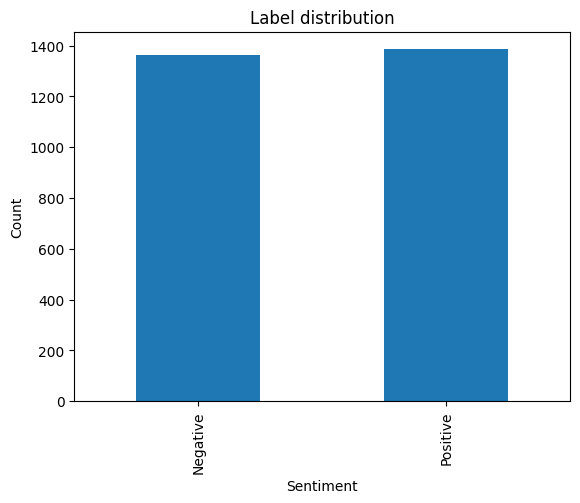

In [5]:
print(df["label"].value_counts())
ax = (df["label"].map({0:"Negative",1:"Positive"})
            .value_counts().sort_index().plot.bar(title="Label distribution"))
ax.set_xlabel("Sentiment"); ax.set_ylabel("Count"); plt.show()

Load the dataset from a single TSV file or from a directory.

In [6]:
def simple_clean(s: str) -> str:
    s = s.lower()
    s = re.sub(r"[^a-z0-9' ]+", " ", s)  # keep letters, digits, apostrophes, spaces
    s = re.sub(r"\s+", " ", s).strip()
    return s

df["text_clean"] = df["text"].apply(simple_clean)
df = df[df["text_clean"] != ""].reset_index(drop=True)
df[["text","text_clean","label"]].head()

,text,text_clean,label
0,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",good case excellent value,1
2,Great for the jawbone.,great for the jawbone,1
3,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...,0
4,The mic is great.,the mic is great,1


In [7]:
RANDOM_STATE = 42
X = df["text_clean"].values
y = df["label"].values

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=RANDOM_STATE, stratify=y_temp
)
print(f"Split sizes → Train:{len(X_train)}, Val:{len(X_val)}, Test:{len(X_test)}")

Split sizes → Train:2198, Val:275, Test:275


Basic cleanup: drop wholly empty texts and strip whitespace

=== VAL (Word TF-IDF + MNB) ===
Acc:0.8109  F1(w):0.8108

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       136
           1       0.80      0.83      0.82       139

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275



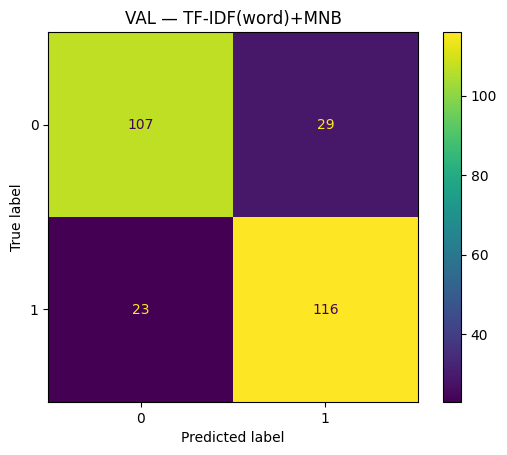

In [8]:
tfidf_word = TfidfVectorizer(ngram_range=(1,2), stop_words="english", min_df=2, max_df=0.95)
Xtr_w = tfidf_word.fit_transform(X_train)
Xva_w = tfidf_word.transform(X_val)
Xte_w = tfidf_word.transform(X_test)

nb = MultinomialNB().fit(Xtr_w, y_train)

predA = nb.predict(Xva_w)
accA  = accuracy_score(y_val, predA)
f1A   = f1_score(y_val, predA, average="weighted")
print(f"=== VAL (Word TF-IDF + MNB) ===\nAcc:{accA:.4f}  F1(w):{f1A:.4f}\n")
print(classification_report(y_val, predA))
ConfusionMatrixDisplay.from_predictions(y_val, predA); plt.title("VAL — TF-IDF(word)+MNB"); plt.show()

=== VAL (Char TF-IDF + SVM) ===
Acc:0.8327  F1(w):0.8326

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       136
           1       0.85      0.81      0.83       139

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275



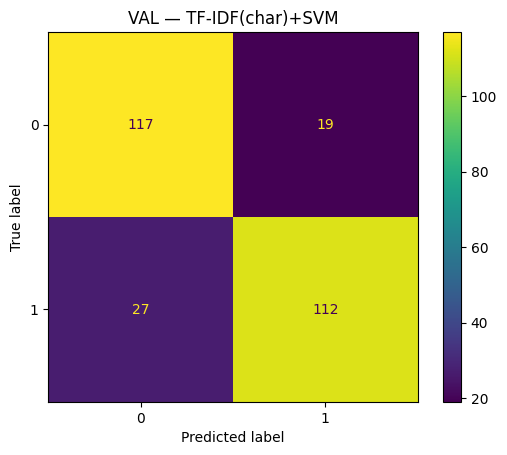

In [9]:
tfidf_char = TfidfVectorizer(analyzer="char", ngram_range=(3,5), min_df=2, max_df=0.95)
Xtr_c = tfidf_char.fit_transform(X_train)
Xva_c = tfidf_char.transform(X_val)
Xte_c = tfidf_char.transform(X_test)

svm = LinearSVC(random_state=RANDOM_STATE).fit(Xtr_c, y_train)

predB = svm.predict(Xva_c)
accB  = accuracy_score(y_val, predB)
f1B   = f1_score(y_val, predB, average="weighted")
print(f"=== VAL (Char TF-IDF + SVM) ===\nAcc:{accB:.4f}  F1(w):{f1B:.4f}\n")
print(classification_report(y_val, predB))
ConfusionMatrixDisplay.from_predictions(y_val, predB); plt.title("VAL — TF-IDF(char)+SVM"); plt.show()